In [1]:
# Install required packages
!pip install transformers[torch]
!pip install -U datasets
!pip install huggingface_hub
!pip install accelerate -U

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [2]:
# Reference: https://huggingface.co/docs/transformers/model_sharing
# make sure that you have a token generated from your HuggingFace account

from huggingface_hub import notebook_login
notebook_login()

In [3]:
# Load Dataset

from datasets import load_dataset

dataset = load_dataset("SetFit/ag_news")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [4]:
# Deskripsi dataset
print("Deskripsi Dataset:")
print(dataset['train'].features)

Deskripsi Dataset:
{'text': Value(dtype='string', id=None), 'label': Value(dtype='int64', id=None), 'label_text': Value(dtype='string', id=None)}


In [5]:
# Ukuran dataset
train_size = len(dataset['train'])
test_size = len(dataset['test'])
print(f"Ukuran Dataset: \n - Latihan: {train_size} \n - Uji: {test_size}")

Ukuran Dataset: 
 - Latihan: 120000 
 - Uji: 7600


In [6]:
# Jumlah kelas
unique_labels = dataset['train'].unique('label')
num_classes = len(unique_labels)
print(f"Jumlah Kelas: {num_classes}")

Jumlah Kelas: 4


In [7]:
import pandas as pd

# Distribusi kelas
train_labels = pd.Series(dataset['train']['label'])
test_labels = pd.Series(dataset['test']['label'])
train_distribution = train_labels.value_counts().sort_index()
test_distribution = test_labels.value_counts().sort_index()
print("Distribusi Kelas di Set Latihan:")
print(train_distribution)
print("Distribusi Kelas di Set Uji:")
print(test_distribution)

Distribusi Kelas di Set Latihan:
0    30000
1    30000
2    30000
3    30000
Name: count, dtype: int64
Distribusi Kelas di Set Uji:
0    1900
1    1900
2    1900
3    1900
Name: count, dtype: int64


*   Ukuran: Dataset AG News terdiri dari 120,000 artikel untuk training dan 7,600 artikel untuk testing
*   Jumlah kelas: 4 kelas.
*   Distribusi kelas: Setiap kelas terdistribusi secara merata dengan masing-masing kelas memiliki 30,000 artikel dalam set training.



In [8]:
# Sample Data
dataset["train"][10]

{'text': "Oil and Economy Cloud Stocks' Outlook  NEW YORK (Reuters) - Soaring crude prices plus worries  about the economy and the outlook for earnings are expected to  hang over the stock market next week during the depth of the  summer doldrums.",
 'label': 2,
 'label_text': 'Business'}

In [9]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

# Model initialization
max_length = 128

# Pilih tokenizer dari model yang akan di-fine-tune
model_names = "textattack/roberta-base-ag-news"
tokenizer = AutoTokenizer.from_pretrained(model_names)

model = AutoModelForSequenceClassification.from_pretrained(model_names, num_labels=4)

# Preprocessing
def preprocess_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=max_length)

tokenized_datasets = dataset.map(preprocess_function, batched=True)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/754 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at textattack/roberta-base-ag-news were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Map:   0%|          | 0/120000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [10]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Define the output directory
output_dir = "./roberta-base-ag-news"

training_args = TrainingArguments(
    output_dir=output_dir,           # Direktori untuk menyimpan hasil training
    eval_strategy="epoch",           # Evaluasi pada akhir setiap epoch
    learning_rate=5e-5,              # Learning rate yang lebih tinggi
    per_device_train_batch_size=32,  # Batch size yang lebih besar
    per_device_eval_batch_size=32,   # Batch size untuk evaluasi
    num_train_epochs=2,
    weight_decay=0.01,               # Regularisasi weight decay
    logging_dir='./logs',            # Direktori untuk menyimpan log
    warmup_steps=500,                # Langkah warmup untuk stabilitas awal
    save_steps=500,                  # Langkah untuk menyimpan model
    save_total_limit=1,              # Batas jumlah model yang disimpan
    logging_steps=10,                # Frekuensi logging
    gradient_accumulation_steps=1,   # Gradient accumulation untuk memperbesar effective batch size
    push_to_hub=True,                # to push to hub during the training
)

train_dataset = tokenized_datasets["train"]
eval_dataset = tokenized_datasets["test"]

Parameter TrainingArguments digunakan untuk mengkonfigurasi proses training model menggunakan transformers library dari Hugging Face. Berikut adalah penjelasan setiap parameter yang digunakan:



*   output_dir: Direktori untuk menyimpan hasil training dan model yang sudah dilatih.
*   eval_strategy: Strategi evaluasi, di sini digunakan "epoch" yang berarti evaluasi dilakukan pada akhir setiap epoch.
*   learning_rate: Learning rate yang digunakan untuk optimisasi. Nilai yang lebih tinggi mempercepat proses belajar tetapi dapat menyebabkan ketidakstabilan.
*   per_device_train_batch_size: Ukuran batch yang digunakan saat training per perangkat (misalnya per GPU).
*   per_device_eval_batch_size: Ukuran batch yang digunakan saat evaluasi per perangkat.
*   num_train_epochs: Jumlah epoch untuk melatih model.
*   weight_decay: Regularisasi weight decay untuk mengurangi overfitting.
*   logging_dir: Direktori untuk menyimpan log training.
*   warmup_steps: Langkah-langkah warmup untuk stabilitas awal training.
*   save_steps: Frekuensi langkah untuk menyimpan model.
*   save_total_limit: Batas jumlah model yang disimpan untuk menghemat ruang penyimpanan.
*   logging_steps: Frekuensi langkah untuk mencatat log.
*   gradient_accumulation_steps: Langkah akumulasi gradien untuk memperbesar effective batch size tanpa meningkatkan penggunaan memori GPU.
*   push_to_hub: Mengirim model ke Hugging Face Hub selama training.






In [11]:
# define the evaluation metrics

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    acc = accuracy_score(p.label_ids, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# train the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()
trainer.save_model(output_dir)  # Save the model to the output directory
trainer.push_to_hub(commit_message="Training complete")


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.073000,0.208820,0.941711,0.941634,0.941885,0.941711
2,0.057600,0.249239,0.945658,0.945610,0.945580,0.945658


CommitInfo(commit_url='https://huggingface.co/rizqatasyaa/roberta-base-ag-news/commit/10b03a3196fa9dfd75bc72bbd7215c0f0eee5e6e', commit_message='Training complete', commit_description='', oid='10b03a3196fa9dfd75bc72bbd7215c0f0eee5e6e', pr_url=None, pr_revision=None, pr_num=None)

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

{'eval_loss': 0.2492392361164093, 'eval_accuracy': 0.9456578947368421, 'eval_f1': 0.9456098666270817, 'eval_precision': 0.9455796402621488, 'eval_recall': 0.9456578947368421, 'eval_runtime': 53.3803, 'eval_samples_per_second': 142.375, 'eval_steps_per_second': 4.459, 'epoch': 2.0}


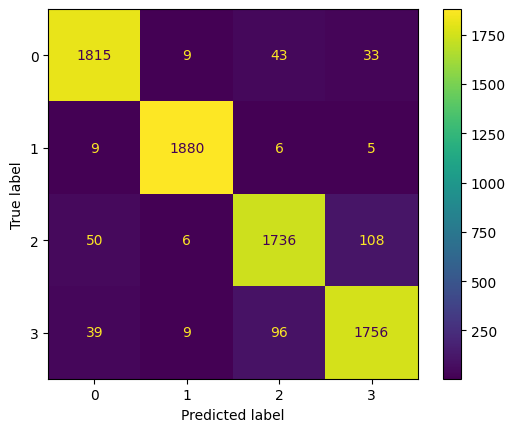

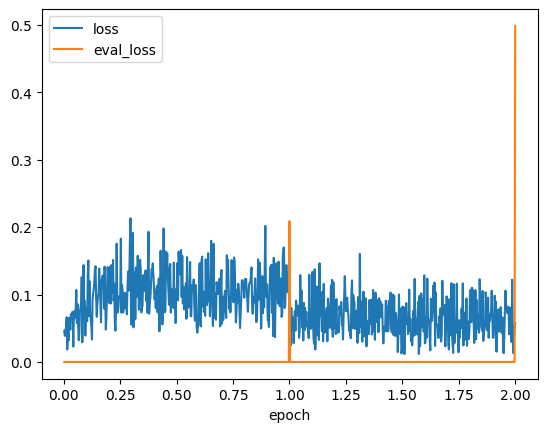

In [12]:
# Tokenize the test dataset
test_tokenized = tokenized_datasets["test"].map(lambda x: tokenizer(x['text'], padding='max_length', truncation=True), batched=True)

# Get the evaluation results
evaluation_results = trainer.evaluate()
print(evaluation_results)

# Use the tokenized dataset in predictions
predictions = trainer.predict(test_tokenized)  # Ensure you're passing the tokenized test dataset
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = test_tokenized["label"]

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()

# Show log history
log_history = pd.DataFrame(trainer.state.log_history)
log_history = log_history.fillna(0)
log_history = log_history.groupby(["epoch"]).sum()

log_history[["loss", "eval_loss"]].plot()
plt.show()


Pada confusion matrix yang ditampilkan, terdapat empat kelas, yang diindikasikan dengan label 0, 1, 2, dan 3. Berikut adalah analisis dari matriks tersebut:

**Kelas 0:**
- True Positives: 1815 (baris 0, kolom 0) <br>
- False Negatives: 85 (43 + 33 + 9, baris 0, kolom 2 + kolom 3 + kolom 1) <br>
- False Positives: 98 (50 + 39 + 9, baris 2 + baris 3 + baris 1, kolom 0)

**Kelas 1:**
- True Positives: 1880 (baris 1, kolom 1) <br>
- False Negatives: 20 (9 + 6 + 5, baris 1, kolom 0 + kolom 2 + kolom 3) <br>
- False Positives: 24 (9 + 9 + 6, baris 0 + baris 3 + baris 2, kolom 1)

**Kelas 2:**
- True Positives: 1736 (baris 2, kolom 2) <br>
- False Negatives: 164 (50 + 108 + 6, baris 2, kolom 0 + kolom 3 + kolom 1) <br>
- False Positives: 145 (43 + 96 + 6, baris 0 + baris 3 + baris 1, kolom 2)

**Kelas 3:**
- True Positives: 1756 (baris 3, kolom 3) <br>
- False Negatives: 144 (39 + 96 + 9, baris 3, kolom 0 + kolom 2 + kolom 1) <br>
- False Positives: 146 (33 + 5 + 108, baris 0 + baris 1 + baris 2, kolom 3)

**Kesimpulan** <br>
- Akurasi: Sebagian besar prediksi model benar, yang terlihat dari nilai tinggi pada diagonal utama (TP). <br>
- Kelas 1 (label 1) memiliki performa terbaik dengan sangat sedikit FN dan FP, yang menunjukkan bahwa model ini paling akurat dalam mengklasifikasikan kelas ini. <br>
- Kelas 2 dan Kelas 3 memiliki beberapa misclassification, terutama dalam memprediksi kelas lain sebagai kelas 2 atau kelas 3 (FN dan FP lebih tinggi).

Gambar diatas menunjukkan grafik loss dan eval_loss selama pelatihan model:

- Loss (garis biru): Nilai kerugian model pada data pelatihan. Terlihat fluktuatif tetapi cenderung menurun, menunjukkan model sedang belajar.
- Eval_loss (garis oranye): Nilai kerugian pada data validasi. Hampir nol di awal pelatihan, namun melonjak drastis pada akhir epoch kedua.

**Kesimpulan:** <br>
- Model train: Terlihat dari penurunan nilai loss.
- Potensi Overfitting: Ditunjukkan oleh lonjakan eval_loss, yang berarti model mungkin terlalu fit pada data pelatihan dan tidak generalisasi dengan baik pada data validasi.

**Tindakan:**
- Evaluasi kembali learning rate.
- Pertimbangkan teknik early stopping untuk mencegah overfitting.


In [13]:
# Extract class names from the dataset
# Assuming 'label_text' column contains the class names
class_names = list(set(test_tokenized["label_text"]))

# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=class_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    Sci/Tech       0.95      0.96      0.95      1900
    Business       0.99      0.99      0.99      1900
      Sports       0.92      0.91      0.92      1900
       World       0.92      0.92      0.92      1900

    accuracy                           0.95      7600
   macro avg       0.95      0.95      0.95      7600
weighted avg       0.95      0.95      0.95      7600



**Accuracy** <br>
Accuracy: 0.95 (95% dari semua prediksi benar) <br>
**Macro Average** <br>
Macro Avg: Rata-rata sederhana dari precision, recall, dan f1-score dari semua kelas. <br>
- Precision: 0.95
- Recall: 0.95
- F1-Score: 0.95

**Weighted Average** <br>
Weighted Avg: Rata-rata dari precision, recall, dan f1-score yang diperhitungkan berdasarkan jumlah instance di setiap kelas. <br>
- Precision: 0.95
- Recall: 0.95
- F1-Score: 0.95

**Kesimpulan** <br>
Model menunjukkan kinerja yang sangat baik dengan nilai precision, recall, dan f1-score yang tinggi untuk semua kelas. Ini berarti model mampu membuat prediksi yang akurat dan konsisten untuk kelas Sci/Tech, Business, Sports, dan World. Accuracy keseluruhan sebesar 95% menunjukkan bahwa model ini efektif untuk tugas klasifikasi teks pada dataset AG News.